Импортируем необходимые библиотеки

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Реализация методов логистической регрессии

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_loss(w, X, y):
    n = X.shape[1]
    z = np.dot(X.T, w)
   
    sigm = sigmoid(z)

    # Функция потерь
    loss = (-1/n) * np.sum(y.T * np.log(sigm) + (1 - y.T) * np.log(1 - sigm))
    
    # Градиент
    grad = (1/n) * np.dot(X, (sigm - y.T))

    return loss, grad

def optimize(w, X, y, n_iterations, eta):

    losses = []

    for i in range(n_iterations):
        # Вычисляем функцию потерь и градиент
        loss, grad = log_loss(w, X, y)
        # Корректируем веса
        w = w - eta * grad

        losses.append(loss)

    return w, losses

def predict(w, X, b=0.5):

    y_pred = [[]]

    for i in range(X.shape[1]):
        sigm = sigmoid(np.dot(X.T[i], w))
        if sigm >= b:
            y_pred[0].append([1])
        else:
            y_pred[0].append([0])
    
    return y_pred

Генерируем данные и отображаем их на графике

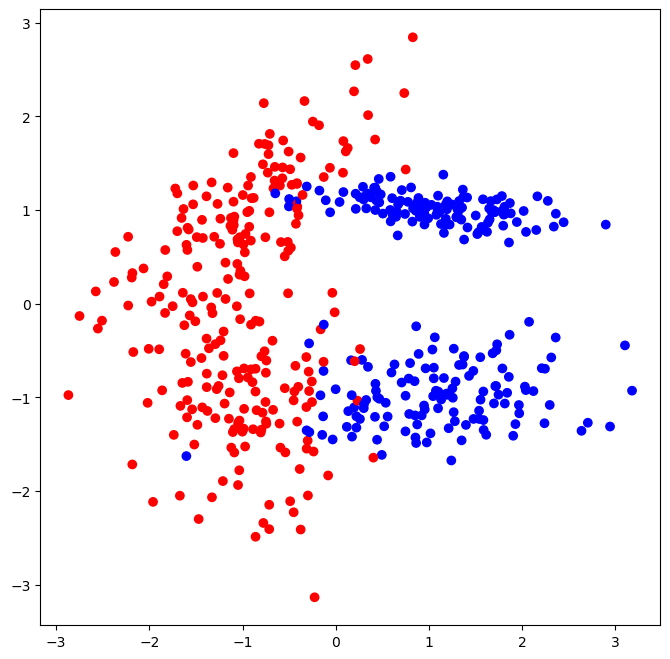

In [11]:
# сгеренируем данные
classes = datasets.make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=10)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()

In [12]:
# перемешивание датасета
np.random.seed(12) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

# подготовка для удобства использования
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

Размер массива признаков обучающей выборки (350, 2)
Размер массива признаков тестовой выборки (150, 2)
Размер массива ответов для обучающей выборки (350,)
Размер массива ответов для тестовой выборки (150,)


In [13]:
# инициализируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr.T)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test - y_test_tr.T)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[ 3.30651302]
 [-0.26727029]]
Точность на обучающей выборке: 92.286
Точность на тестовой выборке: 96.000


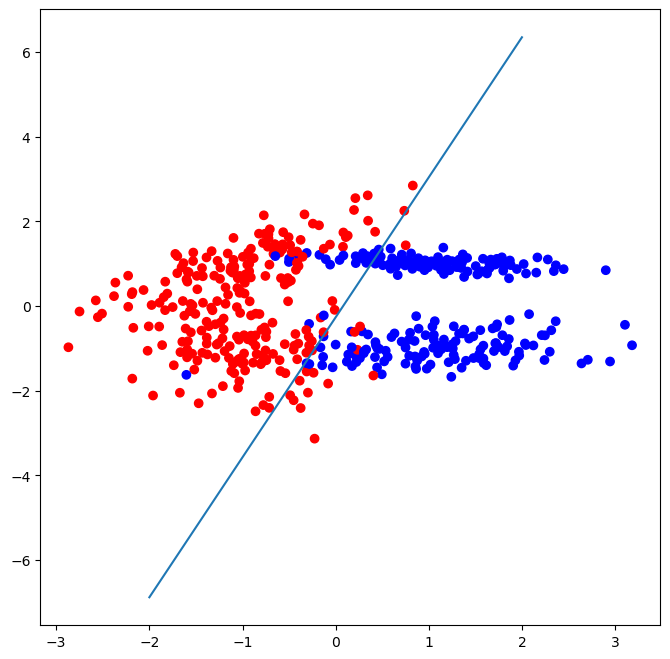

In [14]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, w[0,0]*data+w[1,0])

plt.show()

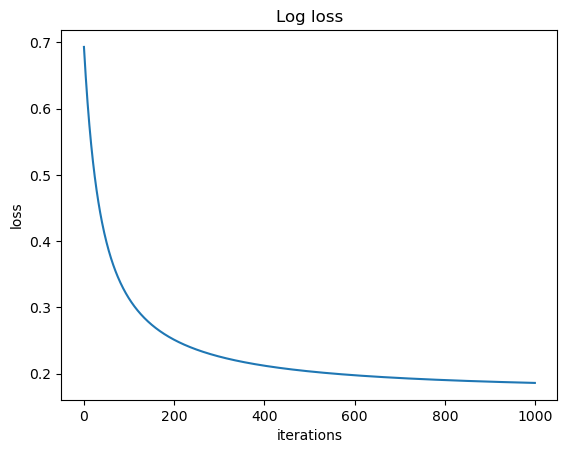

In [15]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

plt.show()

# Ответы на дополнительные вопросы

## Как влияет размер шага (eta) на сходимость алгоритма?

При слишком маленьком размере шага может нехватить итераций для достижения сходимости, а также есть вероятность застревания в локальном минимуме. При слишком большом - возможно перескакивание через оптимальные точки и колебания функции потерь.

## Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций (n_iterations)?

При слишком маленьком количестве итераций алгоритм может не успеть сойтись и веса будут неоптимальными. При слишком большом количестве итераций возможны избыточные вычисления или перескакивание оптимума (при большом размере шага).

## Почему логистическая регрессия подходит для задач только бинарной классификации?

Потому что сигмоида оценивает вероятность получения класса 1, бинарно по своей сути.